### ESMA 4016
### Random Forest con las libreria H20  y scikit-learn
#### Edgar Acuna

In [1]:
import h2o
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import graphviz
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
h2o.init()
h2o.no_progress()


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (Zulu 8.20.0.5-win64) (build 25.121-b15, mixed mode)
  Starting server from C:\Users\edgar2017\Anaconda2\envs\ipykernel_py2\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: c:\users\edgar2~1\appdata\local\temp\tmp4neg_w
  JVM stdout: c:\users\edgar2~1\appdata\local\temp\tmp4neg_w\h2o_edgar2017_started_from_python.out
  JVM stderr: c:\users\edgar2~1\appdata\local\temp\tmp4neg_w\h2o_edgar2017_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,04 secs
H2O cluster timezone:,America/La_Paz
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.6
H2O cluster version age:,26 days
H2O cluster name:,H2O_from_python_edgar2017_574tkv
H2O cluster total nodes:,1
H2O cluster free memory:,1.755 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


### I- Aplicando Random Forest a Diabetes usando H20. 

In [2]:
diabetes = h2o.import_file("https://academic.uprm.edu/eacuna/diabetes.dat")
myx=['C1','C2','C3','C4','C5','C6','C7','C8']
diabetes['C9']=diabetes['C9'].asfactor()
myy="C9"
# Create test/train split
#train, test = vehicle.split_frame(ratios=[0.75], seed=1)
model=H2ORandomForestEstimator(ntrees=50,nfolds=10,max_depth=10)
model.train(myx, myy, training_frame = diabetes)
y_pred=model.predict(diabetes)
print (y_pred['predict']==diabetes['C9']).sum()/float(len(diabetes))

0.9296875


In [3]:
model.model_performance(diabetes)


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.0438876214468
RMSE: 0.209493726509
LogLoss: 0.191752134769
Mean Per-Class Error: 0.00859701492537
AUC: 0.999608208955
Gini: 0.99921641791
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.446517266929: 


,1,2,Error,Rate
1,497.0,3.0,0.006,(3.0/500.0)
2,3.0,265.0,0.0112,(3.0/268.0)
Total,500.0,268.0,0.0078,(6.0/768.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4465173,0.9888060,173.0
max f2,0.3852261,0.9896603,186.0
max f0point5,0.5165249,0.9915123,162.0
max accuracy,0.4465173,0.9921875,173.0
max precision,0.9844273,1.0,0.0
max recall,0.3852261,1.0,186.0
max specificity,0.9844273,1.0,0.0
max absolute_mcc,0.4465173,0.9828060,173.0
max min_per_class_accuracy,0.4465173,0.9888060,173.0
max mean_per_class_accuracy,0.4465173,0.9914030,173.0


Gains/Lift Table: Avg response rate: 34.90 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0104167,0.9538485,2.8656716,2.8656716,1.0,1.0,0.0298507,0.0298507,186.5671642,186.5671642
,2,0.0208333,0.9393818,2.8656716,2.8656716,1.0,1.0,0.0298507,0.0597015,186.5671642,186.5671642
,3,0.03125,0.9334720,2.8656716,2.8656716,1.0,1.0,0.0298507,0.0895522,186.5671642,186.5671642
,4,0.0403646,0.9297001,2.8656716,2.8656716,1.0,1.0,0.0261194,0.1156716,186.5671642,186.5671642
,5,0.0507812,0.9181250,2.8656716,2.8656716,1.0,1.0,0.0298507,0.1455224,186.5671642,186.5671642
,6,0.1002604,0.8658455,2.8656716,2.8656716,1.0,1.0,0.1417910,0.2873134,186.5671642,186.5671642
,7,0.1510417,0.8224490,2.8656716,2.8656716,1.0,1.0,0.1455224,0.4328358,186.5671642,186.5671642
,8,0.2005208,0.7548065,2.8656716,2.8656716,1.0,1.0,0.1417910,0.5746269,186.5671642,186.5671642
,9,0.3007812,0.6051054,2.8656716,2.8656716,1.0,1.0,0.2873134,0.8619403,186.5671642,186.5671642
,10,0.3997396,0.3163898,1.3951296,2.5016287,0.4868421,0.8729642,0.1380597,1.0,39.5129615,150.1628664


In [4]:
#Mostrando la matrix de consusion para estimar la precision out-of-bag y por validacion crizada
model.confusion_matrix

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1525981299314_1


ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.163934271086
RMSE: 0.404887973502
LogLoss: 0.503265711471
Mean Per-Class Error: 0.255462686567
AUC: 0.817313432836
Gini: 0.634626865672
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.288680171967: 


,1,2,Error,Rate
1,322.0,178.0,0.356,(178.0/500.0)
2,42.0,226.0,0.1567,(42.0/268.0)
Total,364.0,404.0,0.2865,(220.0/768.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2886802,0.6726190,245.0
max f2,0.1818539,0.7936508,298.0
max f0point5,0.4590787,0.6674383,162.0
max accuracy,0.4590787,0.7669271,162.0
max precision,0.8792910,0.8571429,18.0
max recall,0.0067975,1.0,390.0
max specificity,0.9930556,0.998,0.0
max absolute_mcc,0.4508353,0.4824187,166.0
max min_per_class_accuracy,0.3833884,0.7350746,196.0
max mean_per_class_accuracy,0.3833884,0.7445373,196.0


Gains/Lift Table: Avg response rate: 34.90 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0104167,0.9303046,2.1492537,2.1492537,0.75,0.75,0.0223881,0.0223881,114.9253731,114.9253731
,2,0.0208333,0.8855258,2.5074627,2.3283582,0.875,0.8125,0.0261194,0.0485075,150.7462687,132.8358209
,3,0.03125,0.8726912,2.1492537,2.2686567,0.75,0.7916667,0.0223881,0.0708955,114.9253731,126.8656716
,4,0.0403646,0.8484478,2.0469083,2.2185845,0.7142857,0.7741935,0.0186567,0.0895522,104.6908316,121.8584497
,5,0.0507812,0.8384970,2.1492537,2.2043628,0.75,0.7692308,0.0223881,0.1119403,114.9253731,120.4362801
,6,0.1002604,0.7414018,2.4131972,2.3074239,0.8421053,0.8051948,0.1194030,0.2313433,141.3197172,130.7423919
,7,0.1510417,0.6784870,2.0574053,2.2233659,0.7179487,0.7758621,0.1044776,0.3358209,105.7405281,122.3365929
,8,0.2005208,0.6151131,1.8098979,2.1213413,0.6315789,0.7402597,0.0895522,0.4253731,80.9897879,112.1341345
,9,0.3007812,0.5025098,1.6003101,1.9476643,0.5584416,0.6796537,0.1604478,0.5858209,60.0310138,94.7664276
,10,0.3997396,0.3964515,1.2443048,1.7735427,0.4342105,0.6188925,0.1231343,0.7089552,24.4304792,77.3542710




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.160504023949
RMSE: 0.400629534545
LogLoss: 0.486402131818
Mean Per-Class Error: 0.243358208955
AUC: 0.823888059701
Gini: 0.647776119403
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.301264671385: 


,1,2,Error,Rate
1,335.0,165.0,0.33,(165.0/500.0)
2,42.0,226.0,0.1567,(42.0/268.0)
Total,377.0,391.0,0.2695,(207.0/768.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3012647,0.6858877,235.0
max f2,0.1639177,0.7901391,301.0
max f0point5,0.5238598,0.6757951,139.0
max accuracy,0.5238598,0.7682292,139.0
max precision,0.9561667,1.0,0.0
max recall,0.0199346,1.0,388.0
max specificity,0.9561667,1.0,0.0
max absolute_mcc,0.3012647,0.4893851,235.0
max min_per_class_accuracy,0.3655833,0.736,206.0
max mean_per_class_accuracy,0.3012647,0.7566418,235.0


Gains/Lift Table: Avg response rate: 34.90 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0104167,0.9168767,2.5074627,2.5074627,0.875,0.875,0.0261194,0.0261194,150.7462687,150.7462687
,2,0.0208333,0.8791130,2.1492537,2.3283582,0.75,0.8125,0.0223881,0.0485075,114.9253731,132.8358209
,3,0.03125,0.8519168,2.1492537,2.2686567,0.75,0.7916667,0.0223881,0.0708955,114.9253731,126.8656716
,4,0.0403646,0.8341947,2.4562900,2.3110255,0.8571429,0.8064516,0.0223881,0.0932836,145.6289979,131.1025518
,5,0.0507812,0.8193004,2.5074627,2.3513203,0.875,0.8205128,0.0261194,0.1194030,150.7462687,135.1320321
,6,0.1002604,0.7426733,2.2623723,2.3074239,0.7894737,0.8051948,0.1119403,0.2313433,126.2372349,130.7423919
,7,0.1510417,0.6777105,2.2778416,2.2974781,0.7948718,0.8017241,0.1156716,0.3470149,127.7841561,129.7478127
,8,0.2005208,0.6119798,1.6590731,2.1399496,0.5789474,0.7467532,0.0820896,0.4291045,65.9073056,113.9949603
,9,0.3007812,0.5030785,1.5630936,1.9476643,0.5454545,0.6796537,0.1567164,0.5858209,56.3093623,94.7664276
,10,0.3997396,0.3998818,1.1688924,1.7548738,0.4078947,0.6123779,0.1156716,0.7014925,16.8892380,75.4873839



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
accuracy,0.7921834,0.0347121,0.75,0.8194444,0.75,0.8214286,0.7926829,0.7464789,0.7083333,0.8148148,0.8714285,0.8472222
auc,0.8257621,0.0384175,0.8306100,0.9032507,0.7702898,0.8630554,0.809375,0.7843137,0.7126736,0.8442623,0.872,0.8677906
err,0.2078166,0.0347121,0.25,0.1805556,0.25,0.1785714,0.2073171,0.2535211,0.2916667,0.1851852,0.1285714,0.1527778
err_count,16.0,2.828427,22.0,13.0,19.0,15.0,17.0,18.0,21.0,15.0,9.0,11.0
f0point5,0.6976275,0.0589528,0.661157,0.7657658,0.6790124,0.754717,0.7267442,0.5769231,0.5769231,0.625,0.8333333,0.776699
f1,0.7226649,0.0399079,0.7441860,0.8395061,0.6984127,0.7619048,0.7462686,0.6666667,0.6315789,0.6666667,0.7272728,0.7441860
f2,0.7595962,0.0551257,0.8510638,0.9289618,0.7189543,0.7692308,0.7668711,0.7894737,0.6976744,0.7142857,0.6451613,0.7142857
lift_top_group,2.9741828,0.3941393,2.5882354,2.1176472,2.5333333,2.7096775,2.5625,3.55,3.0,4.05,3.5,3.1304348
logloss,0.4859727,0.0488812,0.4861503,0.4139280,0.5832542,0.4554629,0.5563267,0.4961885,0.6055196,0.4288428,0.4235902,0.4104642
max_per_class_error,0.3004272,0.0404993,0.3703704,0.3421053,0.2666667,0.2258064,0.21875,0.3137255,0.3125,0.25,0.4,0.3043478


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error
,2018-05-10 15:41:50,4.542 sec,0.0,nan,nan,nan,nan,nan
,2018-05-10 15:41:50,4.551 sec,1.0,0.5065930,6.8293446,0.6943615,1.6165327,0.3024055
,2018-05-10 15:41:50,4.567 sec,2.0,0.5002298,6.6240164,0.6899415,1.8113208,0.3333333
,2018-05-10 15:41:50,4.575 sec,3.0,0.4950258,6.2721698,0.7056227,1.8156546,0.2899824
,2018-05-10 15:41:50,4.579 sec,4.0,0.4980213,5.7713731,0.7051968,1.7489025,0.3164363
---,---,---,---,---,---,---,---,---
,2018-05-10 15:41:50,5.017 sec,46.0,0.4061823,0.5054220,0.8151754,2.1492537,0.2395833
,2018-05-10 15:41:50,5.033 sec,47.0,0.4056058,0.5047662,0.8161381,2.2288557,0.2382812
,2018-05-10 15:41:50,5.049 sec,48.0,0.4049088,0.5021545,0.8178470,2.2288557,0.2369792
,2018-05-10 15:41:50,5.064 sec,49.0,0.4051315,0.5032175,0.8175224,2.1492537,0.2356771



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
C2,1325.0205078,1.0,0.2696337
C6,777.5863647,0.5868486,0.1582341
C8,733.6122437,0.5536610,0.1492857
C7,550.3869629,0.4153800,0.1120004
C1,483.0722961,0.3645772,0.0983023
C5,373.3844910,0.2817953,0.0759815
C3,356.8333130,0.2693040,0.0726134
C4,314.2544250,0.2371695,0.0639489


<bound method ?.confusion_matrix of >

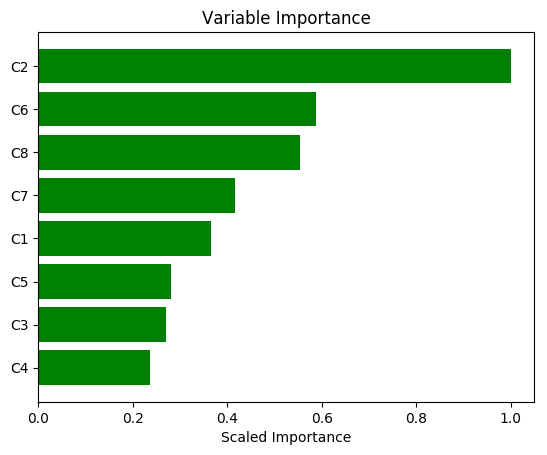

In [5]:
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()
variables = model._model_json['output']['variable_importances']['variable']
y_pos = np.arange(len(variables))
scaled_importance =model._model_json['output']['variable_importances']['scaled_importance']
ax.barh(y_pos, scaled_importance, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()

#### Segun random Forest las variables mas importantes serian plas, age y mass

### II Random Forest  para Diabetes usando scikit learn

In [6]:
url= "http://academic.uprm.edu/eacuna/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_table(url, names=names,header=None)
#La variable de respuesta y debe ser binaria (0,1)
y=data['class']-1
X=data.iloc[:,0:8]
clf = RandomForestClassifier(n_estimators=50,max_depth=10, oob_score=True,random_state=0)
clf.fit(X, y)
print "la Precision estimada es", clf.score(X,y)

la Precision estimada es 0.986979166667


In [7]:
# Tasa de precision
predictions = clf.predict(X)
print(classification_report(y, predictions))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99       500
          1       1.00      0.97      0.98       268

avg / total       0.99      0.99      0.99       768



In [8]:
print(confusion_matrix(y,predictions))

[[499   1]
 [  9 259]]


In [9]:
#Tasa de precision usando out-of-Bag
print clf.oob_score_

0.7421875


In [10]:
print(clf.feature_importances_)

[ 0.08178093  0.25522871  0.08433383  0.07064764  0.06914087  0.17326173
  0.12167218  0.14393411]


#### Nuevamente las variables mas importantes salieron plas mass y age

### III. Random Forest para Landsat usando H2o

In [11]:
#Leyendo los datos
datos= h2o.import_file("http://academic.uprm.edu/eacuna/landsat.txt")
myx=['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13',
            'C14','C15','C16','C17','C18','C19','C20','C21','C22','C23','C24','C25','C26','C27',
           'C28','C29', 'C30','C31','C32','C33','C34','C35','C36']
datos['C37']=datos['C37'].asfactor()
myy="C37"
model=H2ORandomForestEstimator(ntrees=50,max_depth=10,nfolds=10)
model.train(myx, myy, training_frame = datos)
y_pred=model.predict(datos)
print (y_pred['predict']==datos['C37']).sum()/float(len(datos))
model.model_performance(datos)

0.983540022548

ModelMetricsMultinomial: drf
** Reported on test data. **

MSE: 0.0258031645188
RMSE: 0.160633634457
LogLoss: 0.112311220229
Mean Per-Class Error: 0.0257932272703
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



1,2,3,4,5,6,Error,Rate
1072.0,0.0,0.0,0.0,0.0,0.0,0.0,"0 / 1,072"
1.0,475.0,0.0,0.0,2.0,1.0,0.0083507,4 / 479
0.0,0.0,961.0,0.0,0.0,0.0,0.0,0 / 961
0.0,0.0,33.0,371.0,0.0,11.0,0.1060241,44 / 415
11.0,0.0,0.0,0.0,456.0,3.0,0.0297872,14 / 470
0.0,0.0,4.0,7.0,0.0,1027.0,0.0105973,"11 / 1,038"
1084.0,475.0,998.0,378.0,458.0,1042.0,0.0164600,"73 / 4,435"


Top-6 Hit Ratios: 


k,hit_ratio
1,0.98354
2,0.9995490
3,0.9995490
4,1.0
5,1.0
6,1.0


In [12]:
#Mostrando la matrix de consusion para estimar la precision out-of-bag y por validacion crizada
print model.confusion_matrix

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1525981299314_839


ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.084683815751
RMSE: 0.29100483802
LogLoss: 0.307469486294
Mean Per-Class Error: 0.128791712135
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



1,2,3,4,5,6,Error,Rate
1046.0,2.0,16.0,0.0,8.0,0.0,0.0242537,"26 / 1,072"
1.0,467.0,0.0,4.0,4.0,3.0,0.0250522,12 / 479
5.0,2.0,923.0,21.0,1.0,9.0,0.0395421,38 / 961
5.0,4.0,85.0,241.0,3.0,77.0,0.4192771,174 / 415
32.0,5.0,1.0,6.0,390.0,36.0,0.1702128,80 / 470
1.0,2.0,25.0,54.0,16.0,940.0,0.0944123,"98 / 1,038"
1090.0,482.0,1050.0,326.0,422.0,1065.0,0.0965051,"428 / 4,435"


Top-6 Hit Ratios: 


k,hit_ratio
1,0.9034950
2,0.9833146
3,0.9963924
4,0.9979707
5,0.9988726
6,1.0



ModelMetricsMultinomial: drf
** Reported on cross-validation data. **

MSE: 0.08501166418
RMSE: 0.29156759796
LogLoss: 0.274030730864
Mean Per-Class Error: 0.131348756134
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



1,2,3,4,5,6,Error,Rate
1055.0,1.0,14.0,0.0,2.0,0.0,0.0158582,"17 / 1,072"
1.0,465.0,2.0,4.0,5.0,2.0,0.0292276,14 / 479
3.0,2.0,926.0,20.0,1.0,9.0,0.0364204,35 / 961
4.0,6.0,85.0,238.0,2.0,80.0,0.4265060,177 / 415
38.0,7.0,1.0,4.0,385.0,35.0,0.1808511,85 / 470
0.0,2.0,25.0,58.0,18.0,935.0,0.0992293,"103 / 1,038"
1101.0,483.0,1053.0,324.0,413.0,1061.0,0.0971815,"431 / 4,435"


Top-6 Hit Ratios: 


k,hit_ratio
1,0.9028185
2,0.9842165
3,0.9954904
4,0.9984217
5,0.9995491
6,1.0


Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
accuracy,0.9028541,0.0103507,0.8828829,0.8906977,0.9054054,0.8956916,0.8993435,0.8956916,0.9081197,0.9399538,0.9,0.9107552
err,0.0971459,0.0103507,0.1171171,0.1093023,0.0945946,0.1043084,0.1006565,0.1043084,0.0918803,0.0600462,0.1,0.0892449
err_count,43.1,4.6416593,52.0,47.0,42.0,46.0,46.0,46.0,43.0,26.0,44.0,39.0
logloss,0.2740938,0.0182039,0.3116017,0.2854767,0.2838206,0.2919799,0.2574511,0.3107773,0.2566349,0.2388011,0.2687013,0.2356936
max_per_class_error,0.4262600,0.0492649,0.4222222,0.5227272,0.3636364,0.3148148,0.4705882,0.46875,0.4339623,0.3333333,0.5263158,0.40625
mean_per_class_accuracy,0.8687328,0.0121008,0.8594629,0.8559675,0.8694392,0.8671355,0.8739026,0.8426393,0.8833216,0.9084441,0.8556141,0.8714007
mean_per_class_error,0.1312673,0.0121008,0.1405372,0.1440326,0.1305607,0.1328645,0.1260975,0.1573607,0.1166784,0.0915559,0.1443859,0.1285993
mse,0.0850325,0.0069847,0.0964347,0.0903779,0.0871466,0.0937807,0.0809355,0.0980513,0.0774157,0.0655085,0.0861066,0.0745676
r2,0.9757994,0.0019832,0.9729468,0.9744707,0.9752418,0.9718158,0.9773224,0.9733468,0.976679,0.9818212,0.975867,0.9784828
rmse,0.2910927,0.0121973,0.3105394,0.3006292,0.2952059,0.3062364,0.2844917,0.3131314,0.2782367,0.2559463,0.2934392,0.2730706


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error
,2018-05-10 15:42:14,14.702 sec,0.0,nan,nan,nan
,2018-05-10 15:42:14,14.737 sec,1.0,0.4022538,4.2905855,0.1930360
,2018-05-10 15:42:14,14.786 sec,2.0,0.3830573,3.6407621,0.1732283
,2018-05-10 15:42:14,14.802 sec,3.0,0.3658562,3.0395042,0.1603261
,2018-05-10 15:42:14,14.818 sec,4.0,0.3527480,2.6553136,0.1476510
---,---,---,---,---,---,---
,2018-05-10 15:42:15,15.609 sec,46.0,0.2910394,0.3213135,0.0974070
,2018-05-10 15:42:15,15.624 sec,47.0,0.2908539,0.3077242,0.0967306
,2018-05-10 15:42:15,15.657 sec,48.0,0.2911985,0.3084451,0.0974070
,2018-05-10 15:42:15,15.673 sec,49.0,0.2910162,0.3080448,0.0962796



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
C18,9908.1767578,1.0,0.0760632
C21,8288.3955078,0.8365208,0.0636285
C20,7587.7363281,0.7658055,0.0582496
C17,7375.4169922,0.7443768,0.0566197
C13,6705.2622070,0.6767403,0.0514750
---,---,---,---
C3,1080.1689453,0.1090179,0.0082923
C7,1007.6084595,0.1016946,0.0077352
C35,995.9432373,0.1005173,0.0076457
C31,943.9537964,0.0952702,0.0072466



See the whole table with table.as_data_frame()
<bound method ?.confusion_matrix of >


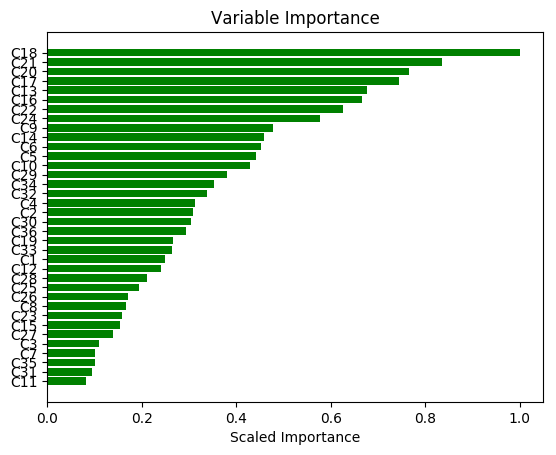

In [13]:
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()
variables = model._model_json['output']['variable_importances']['variable']
y_pos = np.arange(len(variables))
scaled_importance =model._model_json['output']['variable_importances']['scaled_importance']
ax.barh(y_pos, scaled_importance, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()

#### Las 6 variables mas importantes c18, c17, c22, c21, c24 y c20

### IV. Random Forest para Landsat usando Scikit-Learn

In [14]:
url='http://academic.uprm.edu/eacuna/landsat.txt'
data = pd.read_table(url, header=None,delim_whitespace=True)
y=data.iloc[:,36]-1
names=['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13',
            'C14','C15','C16','C17','C18','C19','C20','C21','C22','C23','C24','C25','C26','C27',
           'C28','C29', 'C30','C31','C32','C33','C34','C35','C36','C37']
X=data.iloc[:,0:36]
clf = RandomForestClassifier(n_estimators=50,max_depth=10, oob_score=True, random_state=0)
clf.fit(X, y)
print "la Precision estimada es", clf.score(X,y)

la Precision estimada es 0.972717023675


In [15]:
predictions = clf.predict(X)
print(classification_report(y, predictions))

             precision    recall  f1-score   support

          0       0.97      1.00      0.99      1072
          1       1.00      1.00      1.00       479
          2       0.95      1.00      0.97       961
          3       0.98      0.80      0.88       415
          4       1.00      0.93      0.97       470
          5       0.96      0.99      0.98      1038

avg / total       0.97      0.97      0.97      4435



In [16]:
#Estimacion del error usando out-of-bag
print clf.oob_score_

0.898534385569


In [17]:
print(clf.feature_importances_)

[ 0.0151426   0.02236955  0.00933652  0.01346124  0.03756244  0.02431621
  0.00885772  0.01182643  0.02164484  0.01734902  0.00778902  0.02265685
  0.03495008  0.04105357  0.02258549  0.03426316  0.08886045  0.05336134
  0.02783217  0.04746638  0.04815995  0.04380354  0.01428742  0.02988966
  0.04441645  0.02346674  0.00710566  0.02775813  0.02947498  0.02382096
  0.00788551  0.03829542  0.03270221  0.03890708  0.00804944  0.01929177]


#### Las variables mas importante son 17, 18, 21, 20, 25 y 22

### V. Aplicando Random Forest   a un dataset con missing values 

In [18]:
#Leyendo los datos
datos= h2o.import_file("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",na_strings=[' ?'])
myx=['C1', 'C2', 'C3', 'C4', 'C5','C6','C7','C8','C9','C10','C11', 'C12','C13','C14']
datos['C15']=datos['C15'].asfactor()
myy="C15"
model=H2ORandomForestEstimator(ntrees=100,max_depth=20,nfolds=10)
model.train(myx, myy, training_frame = datos)
y_pred=model.predict(datos)
print (y_pred['predict']==datos['C15']).sum()/float(len(datos))
model.model_performance(datos)

0.942968582046

ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.0488771227439
RMSE: 0.22108171056
LogLoss: 0.170462197519
Mean Per-Class Error: 0.0597196340372
AUC: 0.986052839113
Gini: 0.972105678227
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.426032796918: 


,<=50K,>50K,Error,Rate
<=50K,23744.0,976.0,0.0395,(976.0/24720.0)
>50K,834.0,7007.0,0.1064,(834.0/7841.0)
Total,24578.0,7983.0,0.0556,(1810.0/32561.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4260328,0.8856168,198.0
max f2,0.3119606,0.9227886,239.0
max f0point5,0.5559380,0.8982866,151.0
max accuracy,0.4260328,0.9444120,198.0
max precision,0.9997843,1.0,0.0
max recall,0.1351153,1.0,310.0
max specificity,0.9997843,1.0,0.0
max absolute_mcc,0.4260328,0.8489649,198.0
max min_per_class_accuracy,0.3626069,0.9370146,221.0
max mean_per_class_accuracy,0.3119606,0.9402804,239.0


Gains/Lift Table: Avg response rate: 24.08 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100120,0.9969898,4.1526591,4.1526591,1.0,1.0,0.0415763,0.0415763,315.2659100,315.2659100
,2,0.0201161,0.9913553,4.1526591,4.1526591,1.0,1.0,0.0419589,0.0835353,315.2659100,315.2659100
,3,0.0300052,0.9846607,4.1526591,4.1526591,1.0,1.0,0.0410662,0.1246015,315.2659100,315.2659100
,4,0.0400172,0.9725521,4.1526591,4.1526591,1.0,1.0,0.0415763,0.1661778,315.2659100,315.2659100
,5,0.0500292,0.9531092,4.1526591,4.1526591,1.0,1.0,0.0415763,0.2077541,315.2659100,315.2659100
,6,0.1000276,0.8091905,4.1348037,4.1437341,0.9957002,0.9978508,0.2067338,0.4144879,313.4803686,314.3734134
,7,0.1500261,0.6883603,3.8593202,4.0489489,0.9293612,0.9750256,0.1929601,0.6074480,285.9320158,304.8948883
,8,0.2000246,0.5548609,3.3823255,3.8823186,0.8144963,0.9348994,0.1691111,0.7765591,238.2325532,288.2318633
,9,0.3000215,0.3077728,1.9130801,3.2259730,0.4606880,0.7768451,0.1913021,0.9678612,91.3080052,222.5972966
,10,0.4000184,0.1514657,0.3060928,2.4960590,0.0737101,0.6010749,0.0306083,0.9984696,-69.3907192,149.6058971


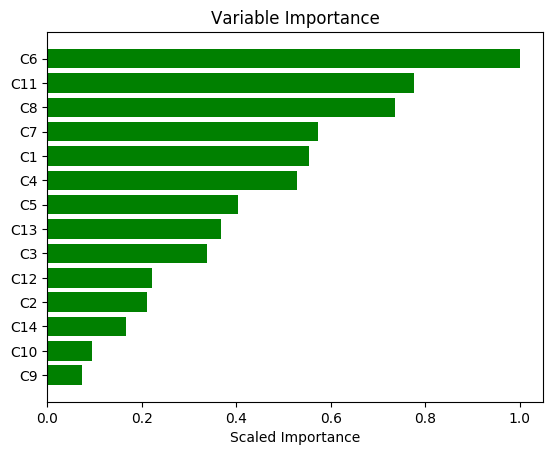

In [19]:
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()
variables = model._model_json['output']['variable_importances']['variable']
y_pos = np.arange(len(variables))
scaled_importance = model._model_json['output']['variable_importances']['scaled_importance']
ax.barh(y_pos, scaled_importance, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()